In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Converting Timestamps to Periods(and Back)

**to_period()** method for Series

In [2]:
rng = pd.date_range('2000-01-01', periods=3, freq='M') # monthly frequency with 3 periods
ts = pd.Series(np.random.randn(3), index=rng)
pts = ts.to_period() # can also be used for DataFrames
pts

2000-01   -0.665318
2000-02   -0.877990
2000-03    0.415674
Freq: M, dtype: float64

In [3]:
ts

2000-01-31   -0.665318
2000-02-29   -0.877990
2000-03-31    0.415674
Freq: M, dtype: float64

Frequency of timestamp is bydefault inherited by **PeriodIndex**

In [4]:
rng = pd.date_range('1/28/2020', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(len(rng)), index=rng)
ts2.to_period('M')

2020-01    0.603324
2020-01    0.579030
2020-01   -1.433110
2020-01   -0.603635
2020-02   -0.522260
2020-02    1.096790
Freq: M, dtype: float64

In [5]:
ts2

2020-01-28    0.603324
2020-01-29    0.579030
2020-01-30   -1.433110
2020-01-31   -0.603635
2020-02-01   -0.522260
2020-02-02    1.096790
Freq: D, dtype: float64

In [6]:
# converting back to timestamps
pts = ts.to_period()
pts

2000-01   -0.665318
2000-02   -0.877990
2000-03    0.415674
Freq: M, dtype: float64

In [7]:
pts.to_timestamp(how='end')

2000-01-31 23:59:59.999999999   -0.665318
2000-02-29 23:59:59.999999999   -0.877990
2000-03-31 23:59:59.999999999    0.415674
Freq: M, dtype: float64

## Converting a PeriodIndex from Arrays

In [8]:
! wget https://resources.oreilly.com/examples/0636920023784/raw/master/pydata-book-master/ch07/macrodata.csv
! mkdir examples
! mv macrodata.csv examples/macrodata.csv

--2020-07-04 11:03:48--  https://resources.oreilly.com/examples/0636920023784/raw/master/pydata-book-master/ch07/macrodata.csv
Resolving resources.oreilly.com (resources.oreilly.com)... 199.27.144.212, 199.27.144.213
Connecting to resources.oreilly.com (resources.oreilly.com)|199.27.144.212|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18242 (18K) [text/plain]
Saving to: ‘macrodata.csv’

macrodata.csv       100%[===================>]  17.81K  --.-KB/s    in 0.02s   

2020-07-04 11:03:49 (850 KB/s) - ‘macrodata.csv’ saved [18242/18242]



In [9]:
data = pd.read_csv('examples/macrodata.csv')

In [10]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [11]:
data.year.unique()

array([1959., 1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967.,
       1968., 1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976.,
       1977., 1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985.,
       1986., 1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994.,
       1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003.,
       2004., 2005., 2006., 2007., 2008., 2009.])

In [12]:
data.quarter.unique()

array([1., 2., 3., 4.])

We can create index of the DataFrame by passing these arrays to PeriodIndex

In [13]:
index = pd.PeriodIndex(year = data.year, quarter = data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [14]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## Resampling and Frequency Conversion

Method - **resample()**

**Resampling** - Conversion of one frequency to another

Higher frequency to lower frequency - **Downsampling**

Lower frequency to higher frequency - **Upsampling**

In [15]:
rng = pd.date_range('2020-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts.resample('M').mean() # resample is similar to groupby

2020-01-31    0.297075
2020-02-29   -0.437663
2020-03-31   -0.126371
2020-04-30    0.335409
Freq: M, dtype: float64

In [16]:
ts.resample('M', kind='period').mean()

2020-01    0.297075
2020-02   -0.437663
2020-03   -0.126371
2020-04    0.335409
Freq: M, dtype: float64

## Downsampling

In [17]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [18]:
# aggregating into five-minute chunks / bars
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [19]:
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [20]:
# default labels are from the left side as in previous cell we have 1999-12-31 23:55:00 as first timestamp
# we can switch to the right edge label using lable option
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

Shifting result index by some **offset** using loffset option

In [21]:
# subtracting 1s from right edge
ts.resample('5min', closed='right', label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

Shifting result index by some **offset** using **shift()** method

In [22]:
ts.resample('5min', closed='right', label='right').sum().shift(-1, freq='S')

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

## Open-High-Low-Close (OHLC) resampling

Aggregate a time series - open, close, high and low using **ohlc()** function

In [23]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [24]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


## Upsampling and Interpolation

No aggregation is required when converting from low to high frequency

In [25]:
frame = pd.DataFrame(np.random.randn(2, 4),\
                     index=pd.date_range('1/1/2020', periods=2, freq='W-WED'),\
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2020-01-01,-1.161153,1.157848,-2.098580,0.706934
2020-01-08,0.806454,-0.004438,-1.945999,1.315351


Missing values will result in gaps (from 2020-01-02 to 2020-01-07)

In [26]:
df_daily = frame.resample('D').sum()
df_daily

,Colorado,Texas,New York,Ohio
2020-01-01,-1.161153,1.157848,-2.098580,0.706934
2020-01-02,0.000000,0.000000,0.000000,0.000000
2020-01-03,0.000000,0.000000,0.000000,0.000000
2020-01-04,0.000000,0.000000,0.000000,0.000000
2020-01-05,0.000000,0.000000,0.000000,0.000000
2020-01-06,0.000000,0.000000,0.000000,0.000000
2020-01-07,0.000000,0.000000,0.000000,0.000000
2020-01-08,0.806454,-0.004438,-1.945999,1.315351


Fill Forward values on Non-Wednesdays

In [27]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2020-01-01,-1.161153,1.157848,-2.098580,0.706934
2020-01-02,-1.161153,1.157848,-2.098580,0.706934
2020-01-03,-1.161153,1.157848,-2.098580,0.706934
2020-01-04,-1.161153,1.157848,-2.098580,0.706934
2020-01-05,-1.161153,1.157848,-2.098580,0.706934
2020-01-06,-1.161153,1.157848,-2.098580,0.706934
2020-01-07,-1.161153,1.157848,-2.098580,0.706934
2020-01-08,0.806454,-0.004438,-1.945999,1.315351


Fill Forward to certain number of periods

In [28]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2020-01-01,-1.161153,1.157848,-2.098580,0.706934
2020-01-02,-1.161153,1.157848,-2.098580,0.706934
2020-01-03,-1.161153,1.157848,-2.098580,0.706934
2020-01-04,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN
2020-01-08,0.806454,-0.004438,-1.945999,1.315351


New data index need not overlap with the old one

In [29]:
frame

,Colorado,Texas,New York,Ohio
2020-01-01,-1.161153,1.157848,-2.098580,0.706934
2020-01-08,0.806454,-0.004438,-1.945999,1.315351


In [30]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2020-01-02,-1.161153,1.157848,-2.098580,0.706934
2020-01-09,0.806454,-0.004438,-1.945999,1.315351


## Resampling with Periods

In [31]:
frame = pd.DataFrame(np.random.randn(24, 4), index = pd.period_range('1-2000', '12-2001', freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])

frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-0.899592,-0.382352,0.523694,1.003442
2000-02,0.600348,-0.652833,-0.502205,0.804211
2000-03,0.085363,1.148320,-0.597328,-0.185173
2000-04,0.057720,1.701910,-0.373043,-0.930213
2000-05,-0.678219,1.348994,-0.305559,-2.115691


In [32]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.101791,0.416110,-0.402899,-0.338594
2001,-0.472245,-0.826247,0.174334,-0.138736


Unsampling can be achieved by **convention** argument: **start**, **end**

In [33]:
#Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.101791,0.416110,-0.402899,-0.338594
2000Q2,0.101791,0.416110,-0.402899,-0.338594
2000Q3,0.101791,0.416110,-0.402899,-0.338594
2000Q4,0.101791,0.416110,-0.402899,-0.338594
2001Q1,-0.472245,-0.826247,0.174334,-0.138736
2001Q2,-0.472245,-0.826247,0.174334,-0.138736
2001Q3,-0.472245,-0.826247,0.174334,-0.138736
2001Q4,-0.472245,-0.826247,0.174334,-0.138736


In [34]:
annual_frame.resample('Q-DEC', convention='start').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.101791,0.416110,-0.402899,-0.338594
2000Q2,0.101791,0.416110,-0.402899,-0.338594
2000Q3,0.101791,0.416110,-0.402899,-0.338594
2000Q4,0.101791,0.416110,-0.402899,-0.338594
2001Q1,-0.472245,-0.826247,0.174334,-0.138736
2001Q2,-0.472245,-0.826247,0.174334,-0.138736
2001Q3,-0.472245,-0.826247,0.174334,-0.138736
2001Q4,-0.472245,-0.826247,0.174334,-0.138736


In [35]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.101791,0.416110,-0.402899,-0.338594
2001Q1,0.101791,0.416110,-0.402899,-0.338594
2001Q2,0.101791,0.416110,-0.402899,-0.338594
2001Q3,0.101791,0.416110,-0.402899,-0.338594
2001Q4,-0.472245,-0.826247,0.174334,-0.138736


While performing upsampling or downsampling Quarterly, annual and weekly frequencies should be used with appropriate sub period or super period, else it will raise exeption

In [36]:
# since annual frame is defined by A-DEC, we can apply quarterly downsampling easily
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.101791,0.416110,-0.402899,-0.338594
2001Q1,0.101791,0.416110,-0.402899,-0.338594
2001Q2,0.101791,0.416110,-0.402899,-0.338594
2001Q3,0.101791,0.416110,-0.402899,-0.338594
2001Q4,-0.472245,-0.826247,0.174334,-0.138736
2002Q1,-0.472245,-0.826247,0.174334,-0.138736
2002Q2,-0.472245,-0.826247,0.174334,-0.138736
2002Q3,-0.472245,-0.826247,0.174334,-0.138736


## Moving Window Functions

In [37]:
! wget https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/stock_px_2.csv
! mv stock_px_2.csv examples/

--2020-07-04 11:03:58--  https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/stock_px_2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 101402 (99K) [text/plain]
Saving to: ‘stock_px_2.csv’

stock_px_2.csv      100%[===================>]  99.03K  --.-KB/s    in 0.02s   

2020-07-04 11:03:58 (4.83 MB/s) - ‘stock_px_2.csv’ saved [101402/101402]



**rolling()** behaviour is similar to **resample** and **groupby**

[Visualization of expanding window and rolling window](https://miro.medium.com/max/1626/1*fk5NTdtnZ0M7uP7eGWZJ0w.jpeg)

In [38]:
close_px_all = pd.read_csv('examples/stock_px_2.csv', parse_dates=True, index_col=0)
close_px_all.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [39]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


In [40]:
close_px = close_px.resample('B').ffill()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


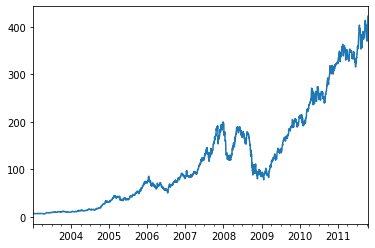

In [41]:
close_px.AAPL.plot();

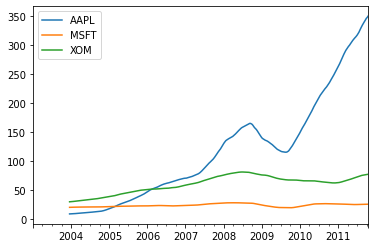

In [42]:
# rolling functions require all of the values in the window to be non-NA
close_px.rolling(250).mean().plot();

In [43]:
# we can change non-NA requirements by period option
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

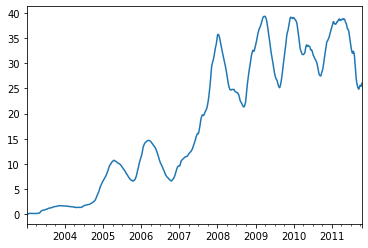

In [44]:
appl_std250.plot();

**expanding()** function

[Visualization of expanding window and rolling window](https://miro.medium.com/max/1626/1*fk5NTdtnZ0M7uP7eGWZJ0w.jpeg)

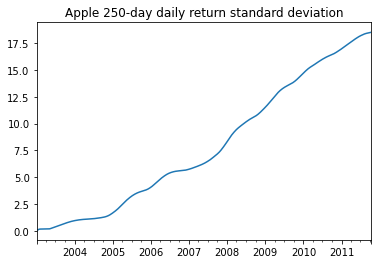

In [45]:
expanding_mean = appl_std250.expanding().mean()
expanding_mean.plot(title='Apple 250-day daily return standard deviation');

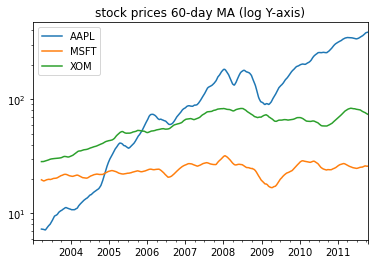

In [46]:
close_px.rolling(60).mean().plot(logy=True, title='stock prices 60-day MA (log Y-axis)');

## Exponentially-weighted functions

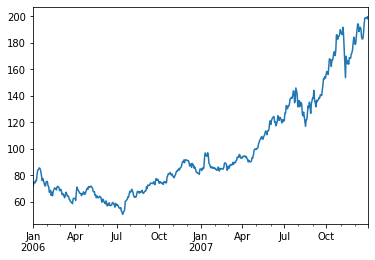

In [52]:
appl_px = close_px.AAPL['2006':'2007'] # filter apple stock price for 2006-07
appl_px.plot()

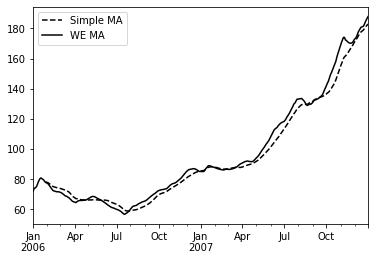

In [68]:
ma60 = appl_px.rolling(50, min_periods=20).mean() # rolling window (moving average)
ewma60 = appl_px.ewm(span=30).mean() # exponential weighted function (exponential-weighted average)
ma60.plot(style='k--', label='Simple MA');
ewma60.plot(style='k-', label='WE MA');
plt.legend();

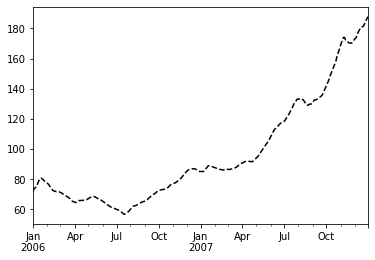

## Binary Moving Window Functions

In [70]:
# apple stock's correlation with S&P 500
spx_px = close_px_all['SPX']
spx_rets = spx_px / spx_px.shift(1) - 1
returns = close_px.pct_change()
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)

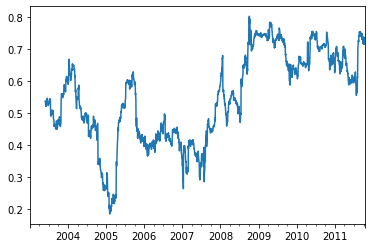

In [71]:
corr.plot()

Compute correlation of a TimeSeries with each column of a DataFrame

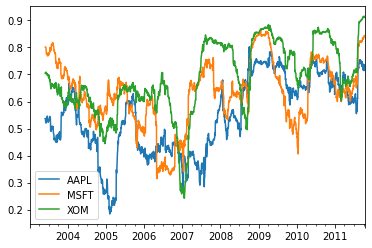

In [73]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot();

## User-Defined Moving Window Functions

Apply more than 1 array function (custom) over a moving window

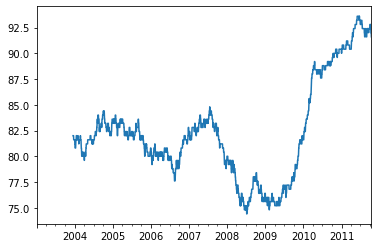

In [75]:
#Percentile rank of a particular value while computing rolling().quantile()
from scipy.stats import percentileofscore
score_at_2_percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2_percent)
result.plot();